In [1]:
import datetime
print(f'Notebook last run (end-to-end): {datetime.datetime.now()}')

Notebook last run (end-to-end): 2023-08-11 03:21:46.836137


In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-1ff53cae-7363-ea7f-e29d-b6eb7086a585)


In [3]:
#Download helper_functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-11 03:21:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-11 03:21:49 (108 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [5]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-08-11 03:21:53--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   719KB/s    in 0.8s    

2023-08-11 03:21:54 (719 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [6]:
#data visualization
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.tail(10)

,id,keyword,location,text,target
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [7]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [8]:
#shuffle the training dataset
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head(10)

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
5559,7934,rainstorm,NaN,@Calum5SOS you look like you got caught in a r...,0
1765,2538,collision,NaN,my favorite lady came to our volunteer meeting...,1
1817,2611,crashed,NaN,@brianroemmele UX fail of EMV - people want to...,1
6810,9756,tragedy,"Los Angeles, CA",Can't find my ariana grande shirt this is a f...,0
4398,6254,hijacking,"Athens,Greece",The Murderous Story Of AmericaÛªs First Hijac...,1


In [9]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
len(train_df)

7613

In [11]:
len(test_df)

3263

In [12]:
#split data into training and validation set

from sklearn.model_selection import train_test_split

train_sentences, val_sentence, train_labels, val_labels = train_test_split(
    train_df_shuffled['text'].to_numpy(),
    train_df_shuffled['target'].to_numpy(),
    test_size=0.1,
    random_state=42
)

In [13]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [14]:
train_labels[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

text_vectorization (Tokenization)

In [15]:
from numpy.random.mtrand import standard_exponential
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split=None,
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None
                                    )

In [16]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [17]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [18]:
# fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [19]:
sample_sentence = 'lol, this is vectorizer'
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[174,  19,   9,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

Embedding Using an Embedding Layer

In [20]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length,
                             name='embedding_1')
embedding

In [21]:
sample_embed = embedding(text_vectorizer([sample_sentence]))
sample_embed

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04140211,  0.03630487, -0.00502647, ...,  0.04149032,
         -0.04580884, -0.00245972],
        [-0.03856609,  0.00013254, -0.04552937, ...,  0.04452859,
          0.01845273,  0.03517746],
        [-0.01049029, -0.02185245, -0.04637436, ..., -0.04034622,
          0.01382421, -0.04930368],
        ...,
        [ 0.00266222,  0.03845349,  0.01448784, ...,  0.01547971,
         -0.00671387,  0.01344175],
        [ 0.00266222,  0.03845349,  0.01448784, ...,  0.01547971,
         -0.00671387,  0.01344175],
        [ 0.00266222,  0.03845349,  0.01448784, ...,  0.01547971,
         -0.00671387,  0.01344175]]], dtype=float32)>

In [22]:
sample_embed[0][12]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.00266222,  0.03845349,  0.01448784,  0.04793477,  0.0260005 ,
        0.04044217,  0.01490558, -0.00734794, -0.00374258,  0.04952042,
       -0.00621707,  0.01162207, -0.02768277, -0.0361899 ,  0.00147527,
       -0.00407715, -0.00094446,  0.04507481, -0.01681626,  0.01688412,
       -0.02560574, -0.02197299,  0.00216726, -0.0367695 , -0.02693485,
       -0.02796171, -0.00011002,  0.02274558, -0.01578374, -0.04540651,
        0.00672013,  0.00010163,  0.0125358 ,  0.02928967, -0.00740377,
       -0.01899471, -0.04231869,  0.01571837, -0.00881433,  0.03442368,
       -0.02488946,  0.00535748,  0.0168134 , -0.01168796, -0.00104847,
        0.00725199, -0.0463101 , -0.02561297, -0.02168893,  0.01380039,
        0.03961346, -0.02169616,  0.04281099, -0.036894  , -0.03592699,
        0.03669537, -0.03323503, -0.00200325, -0.00988289, -0.00665457,
        0.01571861,  0.04555056,  0.02151434,  0.02189061, -0.02087289,
       -0.009822

In [23]:
sample_embed[0][14]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.00266222,  0.03845349,  0.01448784,  0.04793477,  0.0260005 ,
        0.04044217,  0.01490558, -0.00734794, -0.00374258,  0.04952042,
       -0.00621707,  0.01162207, -0.02768277, -0.0361899 ,  0.00147527,
       -0.00407715, -0.00094446,  0.04507481, -0.01681626,  0.01688412,
       -0.02560574, -0.02197299,  0.00216726, -0.0367695 , -0.02693485,
       -0.02796171, -0.00011002,  0.02274558, -0.01578374, -0.04540651,
        0.00672013,  0.00010163,  0.0125358 ,  0.02928967, -0.00740377,
       -0.01899471, -0.04231869,  0.01571837, -0.00881433,  0.03442368,
       -0.02488946,  0.00535748,  0.0168134 , -0.01168796, -0.00104847,
        0.00725199, -0.0463101 , -0.02561297, -0.02168893,  0.01380039,
        0.03961346, -0.02169616,  0.04281099, -0.036894  , -0.03592699,
        0.03669537, -0.03323503, -0.00200325, -0.00988289, -0.00665457,
        0.01571861,  0.04555056,  0.02151434,  0.02189061, -0.02087289,
       -0.009822

Model_0: LSTM

In [24]:
SAVE_DIR = 'model_logs'

In [25]:
# set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers

# create embedding layer for model
model_0_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_for_LSTM')

# Create the model
inputs=layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
#print(x.shape) ->(None, 15)
x = model_0_embedding(x)
#print(x.shape) ->(None, 15, 128)
#x = layers.LSTM(64, return_sequences=True)(x) -> for multilabel RNN we should turn on return_sequences. And LSTM layers expected ndim=3
#print(x.shape) ->(None, 15, 64)
x = layers.LSTM(64)(x)
#print(x.shape) ->(None, 64)
#x = layers.Dense(64, activation='relu')(x)
#print(x.shape) ->(None, 64)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_0 = tf.keras.Model(inputs, outputs, name='model_0_LSTM')

In [26]:
model_0.summary()

Model: "model_0_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_for_LSTM (Embeddi  (None, 15, 128)          1280000   
 ng)                                                             
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
No

In [27]:
# compile model
model_0.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [28]:
model_0_history=model_0.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentence, val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name='LSTM_model_0')])

Saving TensorBoard log files to: model_logs/LSTM_model_0/20230811-032200
Epoch 1/5
215/215 [==============================] - 23s 68ms/step - loss: 0.5081 - accuracy: 0.7435 - val_loss: 0.4558 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3151 - accuracy: 0.8724 - val_loss: 0.5100 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2171 - accuracy: 0.9168 - val_loss: 0.5763 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1518 - accuracy: 0.9442 - val_loss: 0.6059 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1040 - accuracy: 0.9618 - val_loss: 0.8828 - val_accuracy: 0.7546


In [29]:
model_0.evaluate(val_sentence, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.8828 - accuracy: 0.7546


[0.8828439712524414, 0.7545931935310364]

<Axes: >

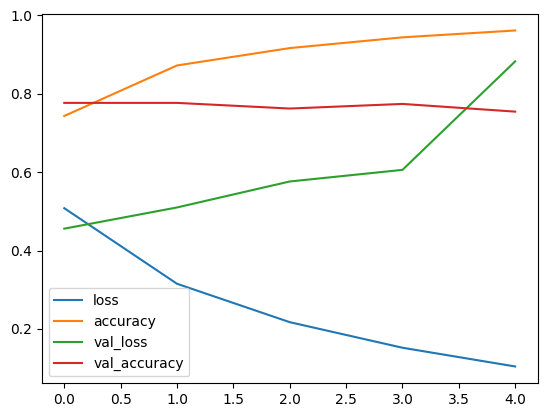

In [30]:
import pandas as pd
pd.DataFrame(model_0_history.history).plot()

In [31]:
test_data = pd.read_csv('test.csv')
test_data.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [32]:
model_0.predict(test_data.text[:5])

1/1 [==============================] - 0s 399ms/step


array([[0.9983387 ],
       [0.09091431],
       [0.9994179 ],
       [0.23314896],
       [0.99964213]], dtype=float32)

In [33]:
test_data.text[:5]

0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object

model_1: GRU

In [34]:
# set random seed and create embedding layer
tf.random.set_seed(42)
from tensorflow.keras import layers
model_1_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_GRU')

# Building models
inputs=layers.Input(shape=(1,), dtype='string')
x=text_vectorizer(inputs)
x=model_1_embedding(x)
print(x.shape)
x=layers.GRU(64, return_sequences=True)(x)
print(x.shape)
x=layers.GRU(64)(x)
print(x.shape)
x=layers.Dense(64, activation='relu')(x)
print(x.shape)
outputs=layers.Dense(1, activation='sigmoid', name='output_layer')(x)
print(outputs.shape)
model_1=tf.keras.Model(inputs, outputs, name='model_1_GRU')



(None, 15, 128)
(None, 15, 64)
(None, 64)
(None, 64)
(None, 1)


In [35]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [36]:
model_1.summary()

Model: "model_1_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_GRU (Embedding)   (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                       

In [37]:
history_model_1 = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentence, val_labels),
                              callbacks=create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                    experiment_name='GRU'))

Saving TensorBoard log files to: model_logs/GRU/20230811-032236
Epoch 1/5
215/215 [==============================] - 16s 56ms/step - loss: 0.5196 - accuracy: 0.7406 - val_loss: 0.4464 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3243 - accuracy: 0.8679 - val_loss: 0.4963 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2241 - accuracy: 0.9159 - val_loss: 0.5503 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1627 - accuracy: 0.9442 - val_loss: 0.6588 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1216 - accuracy: 0.9593 - val_loss: 0.6304 - val_accuracy: 0.7677


<Axes: >

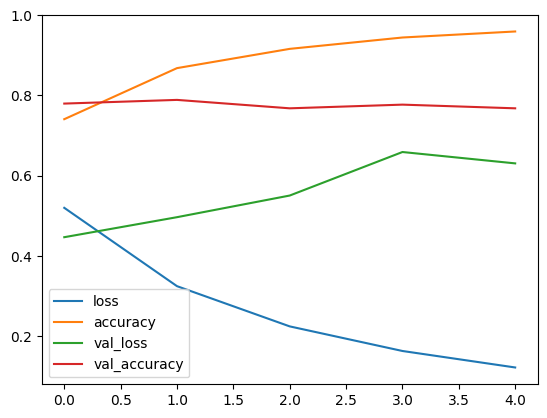

In [38]:
import pandas as pd
pd.DataFrame(history_model_1.history).plot()

model_2: BiLSTM (bidirectional RNN)

In [39]:
# create random seed and embedded layer
tf.random.set_seed(42)
from tensorflow.keras import layers

model_2_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_model_2')

In [40]:
model_2_embedding

In [41]:
# creating model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid', name='output_layer')(x)
model_2 = tf.keras.Model(inputs, outputs, name='BiLSTM')


In [42]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [43]:
model_2.summary()

Model: "BiLSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_model_2 (Embeddin  (None, 15, 128)          1280000   
 g)                                                              
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                            

In [44]:
history_model_2 = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentence, val_labels),
                              callbacks=create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                    experiment_name='BiLSTM'))

Saving TensorBoard log files to: model_logs/BiLSTM/20230811-032304
Epoch 1/5
215/215 [==============================] - 16s 51ms/step - loss: 0.5096 - accuracy: 0.7463 - val_loss: 0.4610 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3133 - accuracy: 0.8717 - val_loss: 0.5146 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2135 - accuracy: 0.9190 - val_loss: 0.5705 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1491 - accuracy: 0.9488 - val_loss: 0.6456 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1060 - accuracy: 0.9629 - val_loss: 0.6756 - val_accuracy: 0.7638


<Axes: >

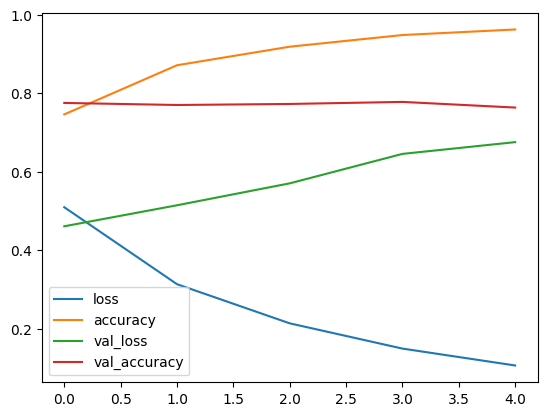

In [45]:
import pandas as pd
pd.DataFrame(history_model_2.history).plot()

CNN (1D)

In [46]:
# test out
embedding_test = embedding(text_vectorizer(['this is Tushar Mahata, I am a ML engineer']))
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation='relu')
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
#outputs
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape


(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [47]:
#set random seed and creating embedding layer
tf.random.set_seed(42)
from tensorflow.keras import layers

model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='model_4_embedding')

In [48]:
model_3_embedding

In [49]:
from keras.api._v2.keras import activations
# creating the CNN model for text
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation='relu')(x)
x = layers.GlobalAvgPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='CNN')

In [50]:
model_3.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [51]:
model_3.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 model_4_embedding (Embeddin  (None, 15, 128)          1280000   
 g)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                               

In [52]:
history_model_3 = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentence, val_labels),
                              callbacks=create_tensorboard_callback(SAVE_DIR,'CNN'))

Saving TensorBoard log files to: model_logs/CNN/20230811-032352
Epoch 1/5
215/215 [==============================] - 13s 47ms/step - loss: 0.5399 - accuracy: 0.7268 - val_loss: 0.4666 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3371 - accuracy: 0.8577 - val_loss: 0.5098 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2327 - accuracy: 0.9102 - val_loss: 0.5813 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1689 - accuracy: 0.9331 - val_loss: 0.6745 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1265 - accuracy: 0.9507 - val_loss: 0.7684 - val_accuracy: 0.7677


<Axes: >

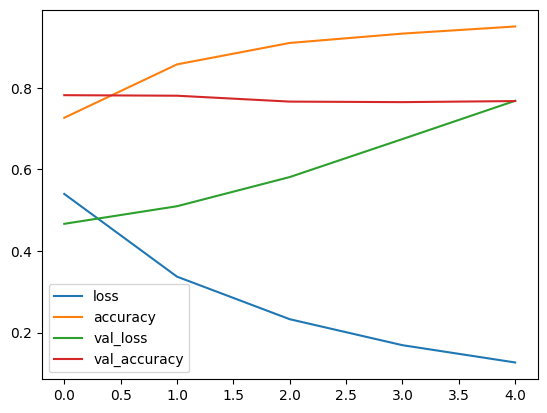

In [53]:
import pandas as pd
pd.DataFrame(history_model_3.history).plot()

Using Pretrained Embeddings (transfer learning for NLP)

Model_4: TensorFlow Hub Pretrained Sentence Encoder

In [54]:
# Example
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_samples = embed([sample_sentence,
                       'When you call the universal sentence encoder on a sentence, it turns it into numbers.'])
embed_samples.shape

TensorShape([2, 512])

In [56]:
embed_samples[1]

<tf.Tensor: shape=(512,), dtype=float32, numpy=
array([ 3.59668694e-02, -8.57946798e-02, -1.15274144e-02,  5.25985844e-03,
       -1.85217131e-02, -5.04200943e-02, -3.61693688e-02,  5.34677645e-03,
        4.80591431e-02,  4.69073839e-02, -3.72332968e-02, -1.14954533e-02,
        4.35241573e-02,  7.05099255e-02,  7.09376037e-02, -8.18043128e-02,
        8.71717557e-03, -4.65412140e-02, -2.24577766e-02,  4.68686968e-02,
        2.02253275e-03,  3.09906900e-02,  2.04356313e-02,  6.39217049e-02,
       -7.64108598e-02,  8.42117965e-02, -4.57603857e-02, -1.06165686e-03,
       -2.05941554e-02,  1.24110803e-02,  5.72754033e-02,  3.81562077e-02,
       -2.74211802e-02, -3.54348123e-03, -9.83258560e-02, -1.24485809e-02,
        3.86562608e-02,  5.03195561e-02, -2.36250591e-02,  3.21849645e-03,
        3.22520919e-02,  7.38094375e-03,  4.47310284e-02, -4.12236620e-03,
        1.15160132e-02,  2.83772424e-02,  6.01401727e-04, -5.90335093e-02,
       -4.94344207e-03, -6.88529434e-03, -4.12424132

In [57]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [59]:
# Create model using the Sequential API
model_4 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_4_PEM")

# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_4.summary()

Model: "model_4_PEM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [60]:
# Train a classifier on top of pretrained embeddings
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentence, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230811-033529
Epoch 1/5
215/215 [==============================] - 7s 15ms/step - loss: 0.5009 - accuracy: 0.7910 - val_loss: 0.4479 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4145 - accuracy: 0.8143 - val_loss: 0.4377 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4003 - accuracy: 0.8210 - val_loss: 0.4336 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3932 - accuracy: 0.8251 - val_loss: 0.4289 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3871 - accuracy: 0.8288 - val_loss: 0.4304 - val_accuracy: 0.8150


<Axes: >

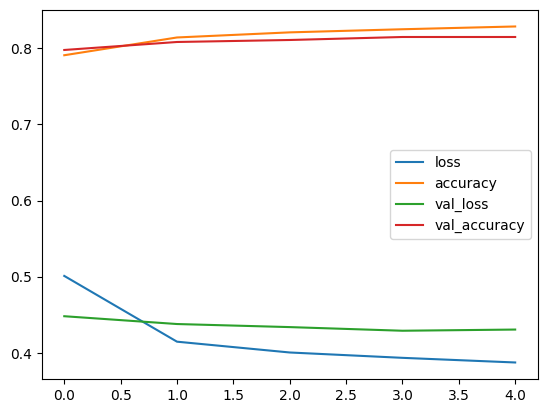

In [61]:
import pandas as pd
pd.DataFrame(model_4_history.history).plot()